<a href="https://colab.research.google.com/github/c-aycan/Previous-Work/blob/main/NYC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
import numpy as np



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset_path = '/content/drive/MyDrive/NYC_Case_Study/nyc-rolling-sales.csv'
df = pd.read_csv(dataset_path)

data_types = df.dtypes
print(data_types)

RANK                               int64
BOROUGH                            int64
NEIGHBORHOOD                      object
BUILDING CLASS CATEGORY           object
TAX CLASS AT PRESENT              object
BLOCK                              int64
LOT                                int64
EASE-MENT                         object
BUILDING CLASS AT PRESENT         object
ADDRESS                           object
APARTMENT NUMBER                  object
ZIP CODE                           int64
RESIDENTIAL UNITS                  int64
COMMERCIAL UNITS                   int64
TOTAL UNITS                        int64
LAND SQUARE FEET                  object
GROSS SQUARE FEET                 object
YEAR BUILT                         int64
TAX CLASS AT TIME OF SALE          int64
BUILDING CLASS AT TIME OF SALE    object
SALE PRICE                        object
SALE DATE                         object
dtype: object


In [ ]:
#Drop missing values
df = df[df['GROSS SQUARE FEET'] != ' -  ']
df = df[df['LAND SQUARE FEET'] != ' -  ']
df = df[df['SALE PRICE'] != ' -  ']
df = df.dropna(subset=['SALE PRICE', 'LAND SQUARE FEET' ])

# Reset the index after dropping rows
df = df.reset_index(drop=True)


# Convert the columns to numeric
df['LAND SQUARE FEET'] = pd.to_numeric(df['LAND SQUARE FEET'], errors='coerce')
df['SALE PRICE'] = pd.to_numeric(df['SALE PRICE'], errors='coerce')
df['GROSS SQUARE FEET'] = pd.to_numeric(df['GROSS SQUARE FEET'], errors='coerce')

Exploratory Analysis

In [ ]:

categorical_columns = ['NEIGHBORHOOD', 'EASE-MENT', 'ADDRESS', 'ZIP CODE', 'LOT', 'BLOCK', 'APARTMENT NUMBER', 'ZIP CODE', 'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS CATEGORY', 'BUILDING CLASS AT TIME OF SALE', 'BUILDING CLASS AT PRESENT', 'TAX CLASS AT PRESENT', 'SALE DATE']
numerical_columns = [col for col in df.columns if col not in categorical_columns]

# Summary statistics
numerical_stats = df[numerical_columns].describe()

# Print the summary statistics
print(numerical_stats)


               RANK       BOROUGH  RESIDENTIAL UNITS  COMMERCIAL UNITS  \
count  48244.000000  48244.000000       48244.000000      48244.000000   
mean   10448.940511      3.251741           2.566537          0.249171   
std     7574.416359      0.903136          17.465481         10.988072   
min        4.000000      1.000000           0.000000          0.000000   
25%     3919.750000      3.000000           1.000000          0.000000   
50%     8084.000000      3.000000           1.000000          0.000000   
75%    17160.000000      4.000000           2.000000          0.000000   
max    26702.000000      5.000000        1844.000000       2261.000000   

        TOTAL UNITS  LAND SQUARE FEET  GROSS SQUARE FEET    YEAR BUILT  \
count  48244.000000      4.824400e+04       4.824400e+04  48244.000000   
mean       2.834632      3.358117e+03       3.669753e+03   1827.765173   
std       20.750418      3.143590e+04       2.947491e+04    464.361153   
min        0.000000      0.000000e+00

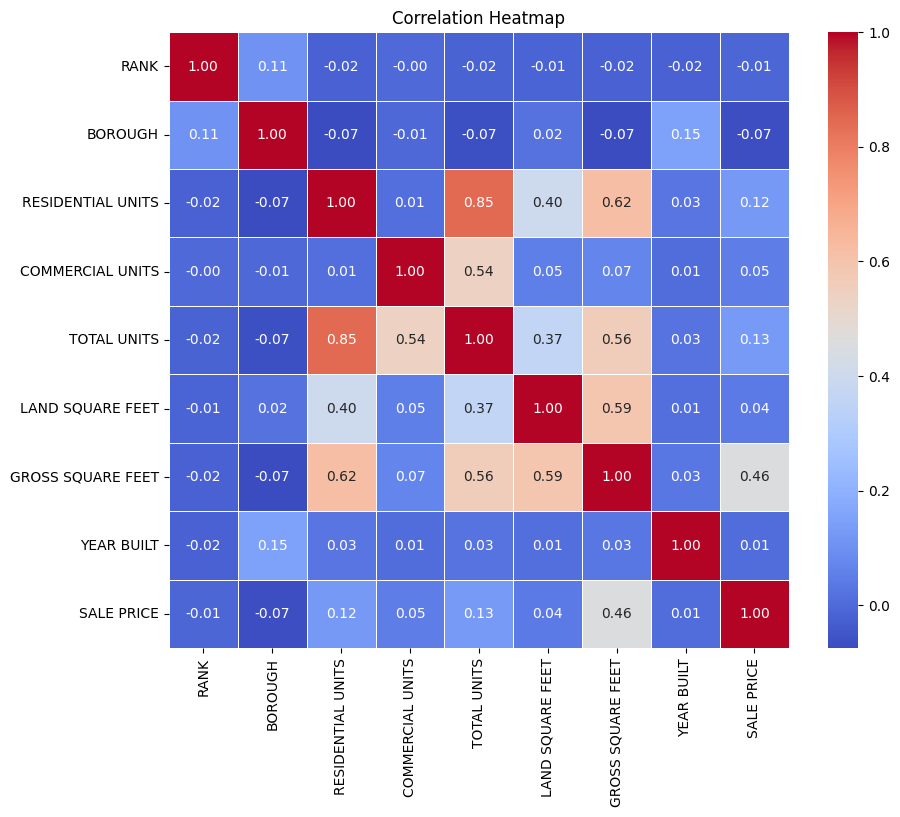

In [ ]:
#Correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt


numerical_data = df[numerical_columns]
correlation_matrix = numerical_data.corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


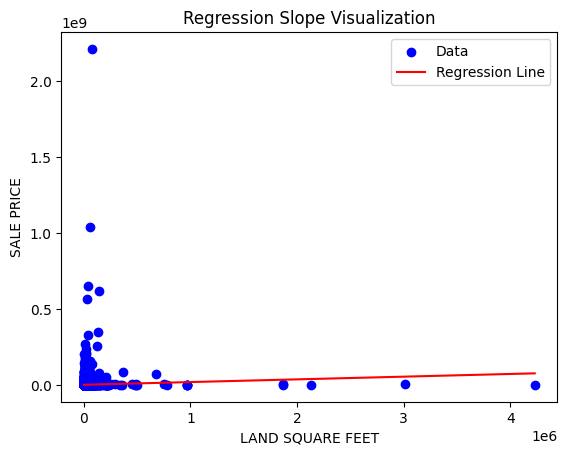

Intercept: 1093687.1731871276
Coefficient: [17.74633837]


In [ ]:
#EXPLORING RELATIONSHIPS: LAND SQUARE FEET & SALE PRICE:

X = df['LAND SQUARE FEET'].values.reshape(-1, 1)
y = df['SALE PRICE'].values

model = LinearRegression()
model.fit(X, y)

# Plot the scatter plot
plt.scatter(X, y, color='blue', label='Data')
X_pred = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_pred = model.predict(X_pred)
plt.plot(X_pred, y_pred, color='red', label='Regression Line')

plt.xlabel('LAND SQUARE FEET')
plt.ylabel('SALE PRICE')
plt.title('Regression Slope Visualization')
plt.legend()

plt.show()
print('Intercept:', model.intercept_)
print('Coefficient:', model.coef_)


In [ ]:
missing_values = df['GROSS SQUARE FEET'].isnull().sum()

# To get NaN values
nan_indices = df[df['GROSS SQUARE FEET'].isnull()].index

print(f"Number of NaN values in 'GROSS SQUARE FEET' column: {missing_values}")
print("Indices of rows with NaN values in 'GROSS SQUARE FEET' column:", nan_indices)

Number of NaN values in 'GROSS SQUARE FEET' column: 0
Indices of rows with NaN values in 'GROSS SQUARE FEET' column: Int64Index([], dtype='int64')


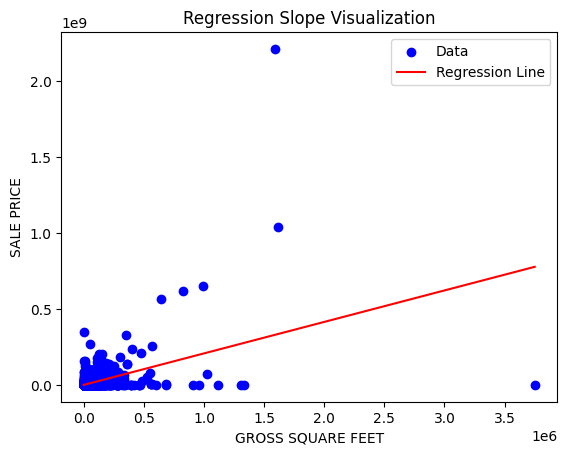

Intercept: 393539.4820124969
Coefficient: [207.02811916]


In [ ]:
#EXPLORING RELATIONSHIPS: GROSS SQUARE FEET & SALE PRICE:

X = df['GROSS SQUARE FEET'].values.reshape(-1, 1)
y = df['SALE PRICE'].values
model.fit(X, y)

# Plot
plt.scatter(X, y, color='blue', label='Data')
X_pred = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_pred = model.predict(X_pred)

plt.plot(X_pred, y_pred, color='red', label='Regression Line')
plt.xlabel('GROSS SQUARE FEET')
plt.ylabel('SALE PRICE')
plt.title('Regression Slope Visualization')
plt.legend()
plt.show()

print('Intercept:', model.intercept_)
print('Coefficient:', model.coef_)


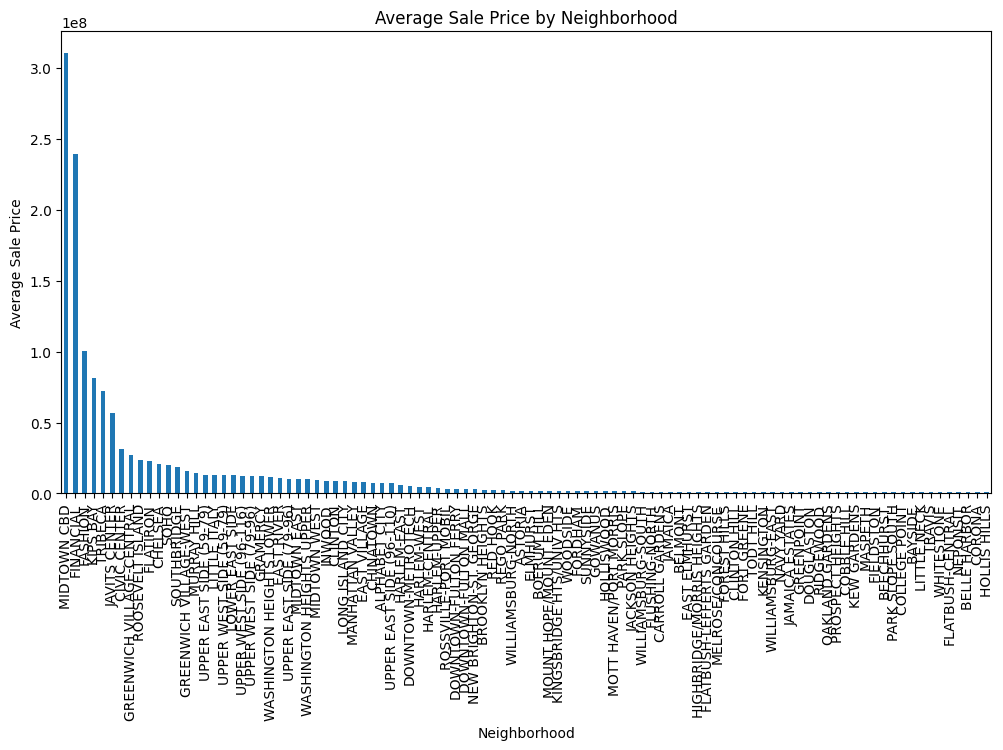

In [ ]:
#EXPLORING NEIGHBORHOOD & Sale Price
average_price_by_neighborhood = df.groupby('NEIGHBORHOOD')['SALE PRICE'].mean()
average_price_by_neighborhood_sorted = average_price_by_neighborhood.sort_values(ascending=False).head(100)

plt.figure(figsize=(12, 6))
average_price_by_neighborhood_sorted.plot(kind='bar')
plt.xlabel('Neighborhood')
plt.ylabel('Average Sale Price')
plt.title('Average Sale Price by Neighborhood')
plt.xticks(rotation=90)
plt.show()

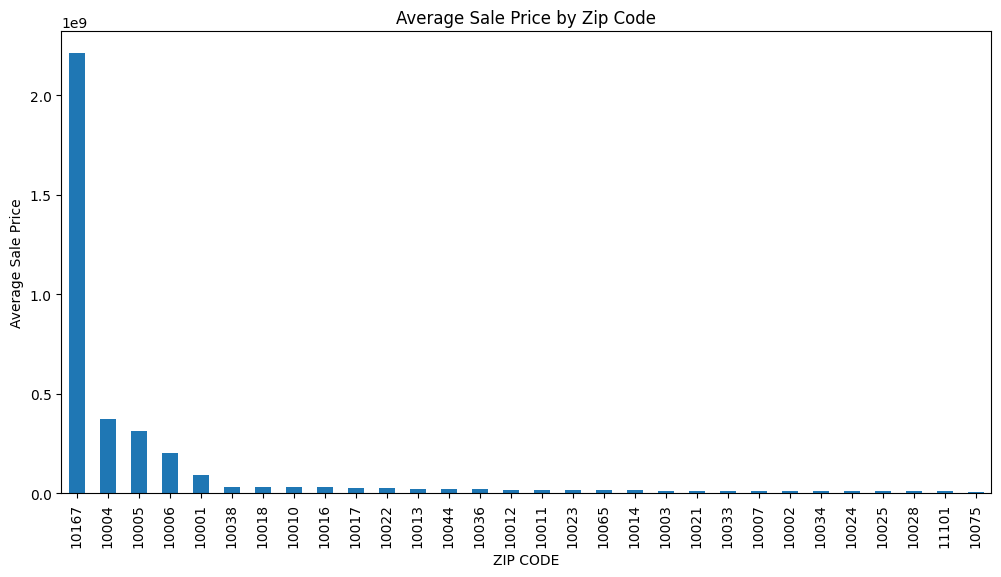

In [ ]:
#EXPLORING ZIP CODE
average_price_by_zip = df.groupby('ZIP CODE')['SALE PRICE'].mean()
average_price_by_zip_sorted = average_price_by_zip.sort_values(ascending=False).head(30)


plt.figure(figsize=(12, 6))
average_price_by_zip_sorted.plot(kind='bar')
plt.xlabel('ZIP CODE')
plt.ylabel('Average Sale Price')
plt.title('Average Sale Price by Zip Code')
plt.xticks(rotation=90)
plt.show()

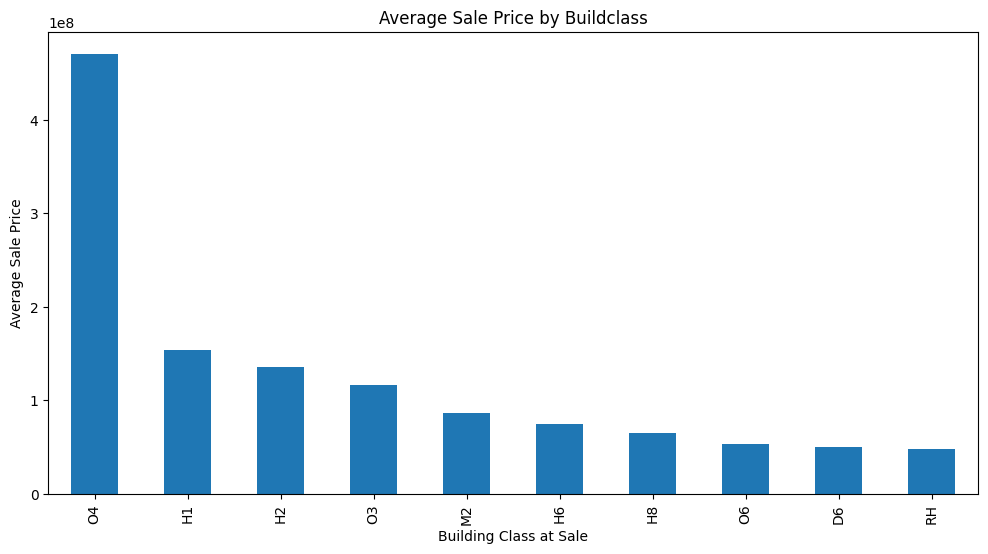

In [ ]:
#EXPLORING BUILDING CLASS
average_price_by_buildclass = df.groupby('BUILDING CLASS AT TIME OF SALE')['SALE PRICE'].mean()
average_price_by_buildclass_sorted = average_price_by_buildclass.sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
average_price_by_buildclass_sorted.plot(kind='bar')
plt.xlabel('Building Class at Sale')
plt.ylabel('Average Sale Price')
plt.title('Average Sale Price by Buildclass')
plt.xticks(rotation=90)
plt.show()

int64
[1 2 3 4 5]
BOROUGH
1    1.851722e+07
4    9.123055e+05
3    8.344884e+05
2    5.901936e+05
5    5.286038e+05
Name: SALE PRICE, dtype: float64


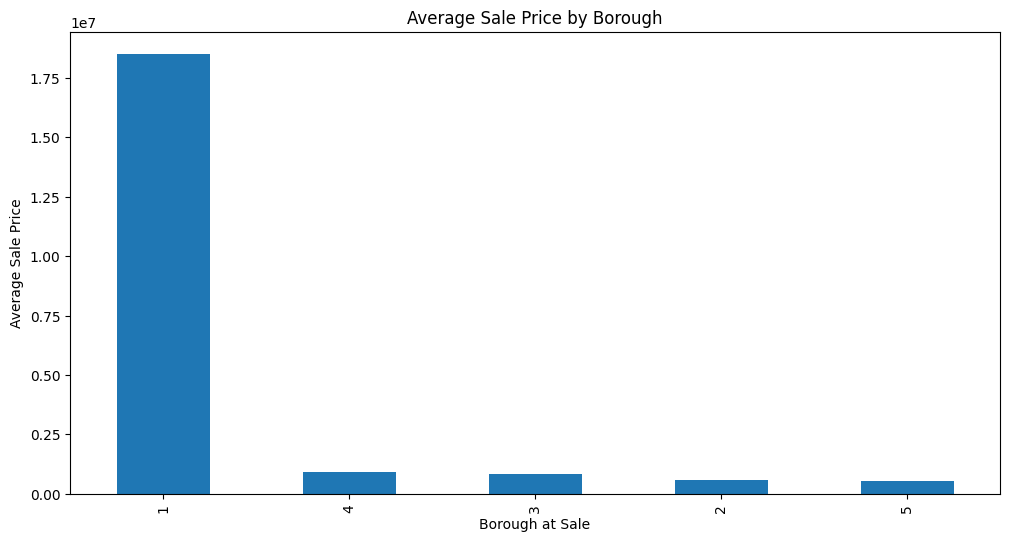

In [ ]:
#Exploring Borough

print(df['BOROUGH'].dtypes)
unique_values = df['BOROUGH'].unique()
print(unique_values)

#Mean Price by Borough
average_price_by_borough = df.groupby('BOROUGH')['SALE PRICE'].mean()
average_price_by_borough_sorted = average_price_by_borough.sort_values(ascending=False)
print(average_price_by_borough_sorted)

plt.figure(figsize=(12, 6))
average_price_by_borough_sorted.plot(kind='bar')
plt.xlabel('Borough at Sale')
plt.ylabel('Average Sale Price')
plt.title('Average Sale Price by Borough')
plt.xticks(rotation=90)
plt.show()

TAX CLASS AT TIME OF SALE
4    5.227646e+06
2    1.441178e+06
1    5.955229e+05
3    0.000000e+00
Name: SALE PRICE, dtype: float64


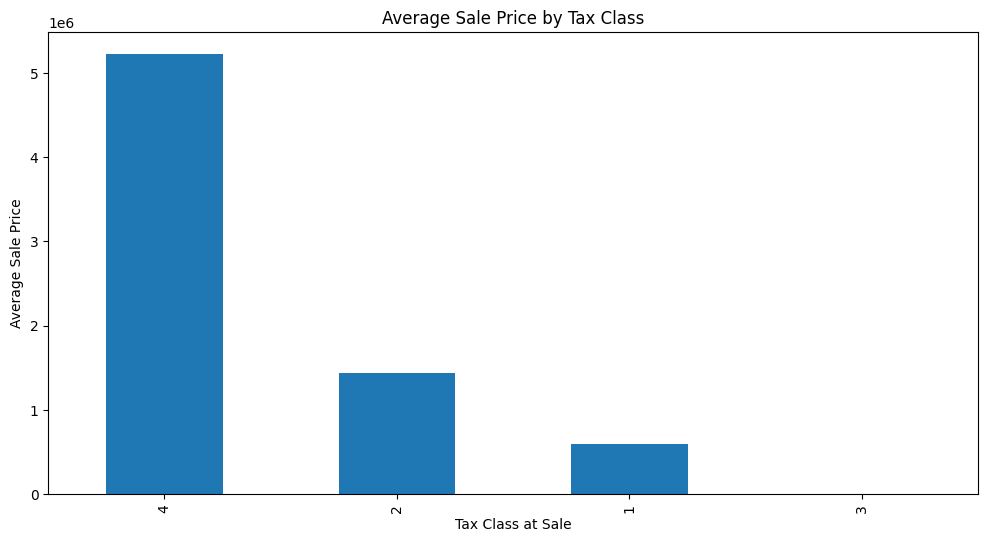

In [ ]:
#Exploring Tax Class
average_price_by_taxclass = df.groupby('TAX CLASS AT TIME OF SALE')['SALE PRICE'].mean()
average_price_by_taxclass_sorted = average_price_by_taxclass.sort_values(ascending=False)
print(average_price_by_taxclass_sorted)

plt.figure(figsize=(12, 6))
average_price_by_taxclass_sorted.plot(kind='bar')
plt.xlabel('Tax Class at Sale')
plt.ylabel('Average Sale Price')
plt.title('Average Sale Price by Tax Class')
plt.xticks(rotation=90)
plt.show()


In [ ]:
# I will handle the categorical variables later in this notebook.
# Methods will be encoding/labeling, ordinal mapping and incorporating their weights to new features.

**PART 2: Creating new features on SPARK SQL**

In [ ]:
!pip install pyspark
from pyspark.sql import SparkSession
#creating a Spark session
spark = SparkSession.builder.master("local[*]").getOrCreate()

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load the CSV file from Google Drive
file_path = "/content/drive/MyDrive/NYC_Case_Study/nyc-rolling-sales.csv"  # Replace with the actual file path in your Google Drive
df_sql = spark.read.csv(file_path, header=True, inferSchema=True)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Part 2a

In [ ]:
from pyspark.sql.functions import stddev, mean

# Create a SparkSession
spark = SparkSession.builder.getOrCreate()

# Calculate the mean and standard deviation
mean_val = df_sql.select(mean("SALE PRICE")).first()[0]
stddev_val = df_sql.select(stddev("SALE PRICE")).first()[0]

# Calculate the Z-Score
df_sql = df_sql.withColumn("sale_price_zscore", (df_sql["SALE PRICE"] - mean_val) / stddev_val)
df_sql.show(10)


+----+-------+-------------+-----------------------+--------------------+-----+---+---------+-------------------------+--------------------+----------------+--------+-----------------+----------------+-----------+----------------+-----------------+----------+-------------------------+------------------------------+----------+---------------+-------------------+
|RANK|BOROUGH| NEIGHBORHOOD|BUILDING CLASS CATEGORY|TAX CLASS AT PRESENT|BLOCK|LOT|EASE-MENT|BUILDING CLASS AT PRESENT|             ADDRESS|APARTMENT NUMBER|ZIP CODE|RESIDENTIAL UNITS|COMMERCIAL UNITS|TOTAL UNITS|LAND SQUARE FEET|GROSS SQUARE FEET|YEAR BUILT|TAX CLASS AT TIME OF SALE|BUILDING CLASS AT TIME OF SALE|SALE PRICE|      SALE DATE|  sale_price_zscore|
+----+-------+-------------+-----------------------+--------------------+-----+---+---------+-------------------------+--------------------+----------------+--------+-----------------+----------------+-----------+----------------+-----------------+----------+-------------

Part 2b

In [ ]:
from pyspark.sql.window import Window
from pyspark.sql.functions import col, mean, stddev

# Creating a SparkSession
spark = SparkSession.builder.getOrCreate()

# Window specification (for normalizing)
window_spec = Window.partitionBy("NEIGHBORHOOD", "BUILDING CLASS AT TIME OF SALE")

# Calculating the mean and standard deviation within each segment
mean_val = mean(col("SALE PRICE")).over(window_spec).alias("mean_sale_price")
stddev_val = stddev(col("SALE PRICE")).over(window_spec).alias("stddev_sale_price")

# Calculating the Z-Score
df_sql = df_sql.withColumn("sale_price_zscore_neighborhood", (col("SALE PRICE") - mean_val) / stddev_val)

df_sql.show(40)

+----+-------+------------------+-----------------------+--------------------+-----+----+---------+-------------------------+--------------------+----------------+--------+-----------------+----------------+-----------+----------------+-----------------+----------+-------------------------+------------------------------+----------+---------------+--------------------+------------------------------+
|RANK|BOROUGH|      NEIGHBORHOOD|BUILDING CLASS CATEGORY|TAX CLASS AT PRESENT|BLOCK| LOT|EASE-MENT|BUILDING CLASS AT PRESENT|             ADDRESS|APARTMENT NUMBER|ZIP CODE|RESIDENTIAL UNITS|COMMERCIAL UNITS|TOTAL UNITS|LAND SQUARE FEET|GROSS SQUARE FEET|YEAR BUILT|TAX CLASS AT TIME OF SALE|BUILDING CLASS AT TIME OF SALE|SALE PRICE|      SALE DATE|   sale_price_zscore|sale_price_zscore_neighborhood|
+----+-------+------------------+-----------------------+--------------------+-----+----+---------+-------------------------+--------------------+----------------+--------+-----------------+------

Part 2c

In [ ]:
from pyspark.sql.functions import col

# Computing the square_ft_per_unit column
df_sql = df_sql.withColumn("square_ft_per_unit", col("GROSS SQUARE FEET") / col("TOTAL UNITS"))

# Computing the price_per_unit column
df_sql = df_sql.withColumn("price_per_unit", col("SALE PRICE") / col("TOTAL UNITS"))
df_sql.show(10)


+----+-------+------------------+-----------------------+--------------------+-----+---+---------+-------------------------+--------------------+----------------+--------+-----------------+----------------+-----------+----------------+-----------------+----------+-------------------------+------------------------------+----------+---------------+--------------------+------------------------------+------------------+------------------+
|RANK|BOROUGH|      NEIGHBORHOOD|BUILDING CLASS CATEGORY|TAX CLASS AT PRESENT|BLOCK|LOT|EASE-MENT|BUILDING CLASS AT PRESENT|             ADDRESS|APARTMENT NUMBER|ZIP CODE|RESIDENTIAL UNITS|COMMERCIAL UNITS|TOTAL UNITS|LAND SQUARE FEET|GROSS SQUARE FEET|YEAR BUILT|TAX CLASS AT TIME OF SALE|BUILDING CLASS AT TIME OF SALE|SALE PRICE|      SALE DATE|   sale_price_zscore|sale_price_zscore_neighborhood|square_ft_per_unit|    price_per_unit|
+----+-------+------------------+-----------------------+--------------------+-----+---+---------+------------------------

In [ ]:
# Compute the price_per_square_ft column
df_sql = df_sql.withColumn("price_per_square_ft", col("price_per_unit") / col("square_ft_per_unit"))

Extras

In [ ]:
# NEW FEATURE: Price per Square ft normalized on NEIGHBORHOOD and BUILDING CLASS
# Objective: To get a feature that is based on a more fine-level data
# Result: Drops my model R2 from 0.86 to 0.46. Therefore I exclude this.

# Creating a SparkSession
spark = SparkSession.builder.getOrCreate()
window_spec = Window.partitionBy("NEIGHBORHOOD", "BUILDING CLASS AT TIME OF SALE")

mean_val = mean(col("price_per_square_ft")).over(window_spec).alias("mean_price_per_square_ft")
stddev_val = stddev(col("price_per_square_ft")).over(window_spec).alias("stddev_price_persquare_ft")

df_sql_out = df_sql.withColumn("price_per_square_ft_zscore_neighborhood", (col("price_per_square_ft") - mean_val) / stddev_val)

df_sql.show(5)


+----+-------+------------------+-----------------------+--------------------+-----+---+---------+-------------------------+-------------------+----------------+--------+-----------------+----------------+-----------+----------------+-----------------+----------+-------------------------+------------------------------+----------+---------------+--------------------+------------------------------+------------------+-----------------+--------------------+
|RANK|BOROUGH|      NEIGHBORHOOD|BUILDING CLASS CATEGORY|TAX CLASS AT PRESENT|BLOCK|LOT|EASE-MENT|BUILDING CLASS AT PRESENT|            ADDRESS|APARTMENT NUMBER|ZIP CODE|RESIDENTIAL UNITS|COMMERCIAL UNITS|TOTAL UNITS|LAND SQUARE FEET|GROSS SQUARE FEET|YEAR BUILT|TAX CLASS AT TIME OF SALE|BUILDING CLASS AT TIME OF SALE|SALE PRICE|      SALE DATE|   sale_price_zscore|sale_price_zscore_neighborhood|square_ft_per_unit|   price_per_unit| price_per_square_ft|
+----+-------+------------------+-----------------------+--------------------+-----+

In [ ]:
# NEW FEATURE: Price per Square ft normalized on BUILDING CLASS
# Objective: To get a feature that is based on a more fine-level data
# Result: Drops my model R2 from 0.86 to 0.18. Therefore I exclude this.

from pyspark.sql.functions import col, mean as spark_mean, stddev

spark = SparkSession.builder.getOrCreate()
window_spec = Window.partitionBy("BUILDING CLASS AT TIME OF SALE")

mean_val = spark_mean(col("price_per_square_ft")).over(window_spec).alias("mean_price_per_square_ft")
stddev_val = stddev(col("price_per_square_ft")).over(window_spec).alias("stddev_price_persquare_ft")

df_sql_out = df_sql.withColumn("price_per_square_ft_zscore_buildclass", (col("price_per_square_ft") - mean_val) / stddev_val)

df_sql.show(5)

+----+-------+------------------+-----------------------+--------------------+-----+---+---------+-------------------------+-------------------+----------------+--------+-----------------+----------------+-----------+----------------+-----------------+----------+-------------------------+------------------------------+----------+---------------+--------------------+------------------------------+------------------+-----------------+--------------------+
|RANK|BOROUGH|      NEIGHBORHOOD|BUILDING CLASS CATEGORY|TAX CLASS AT PRESENT|BLOCK|LOT|EASE-MENT|BUILDING CLASS AT PRESENT|            ADDRESS|APARTMENT NUMBER|ZIP CODE|RESIDENTIAL UNITS|COMMERCIAL UNITS|TOTAL UNITS|LAND SQUARE FEET|GROSS SQUARE FEET|YEAR BUILT|TAX CLASS AT TIME OF SALE|BUILDING CLASS AT TIME OF SALE|SALE PRICE|      SALE DATE|   sale_price_zscore|sale_price_zscore_neighborhood|square_ft_per_unit|   price_per_unit| price_per_square_ft|
+----+-------+------------------+-----------------------+--------------------+-----+

**PART 3: Build a Simple Linear Regression Model **

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
# Going back to Pandas
df_p = df_sql.toPandas()
df_p = df_p.replace(' -  ', np.nan)

#cleaning and formatting data
df_p = df_p.dropna()
df_p['SALE PRICE'] = pd.to_numeric(df_p['SALE PRICE'], errors='coerce')
df_p['price_per_unit'] = pd.to_numeric(df_p['price_per_unit'], errors='coerce')
df_p['LAND SQUARE FEET'] = pd.to_numeric(df_p['LAND SQUARE FEET'], errors='coerce')
df_p['GROSS SQUARE FEET'] = pd.to_numeric(df_p['GROSS SQUARE FEET'], errors='coerce')

df_p.head(10)
df_p.dtypes


RANK                                int32
BOROUGH                             int32
NEIGHBORHOOD                       object
BUILDING CLASS CATEGORY            object
TAX CLASS AT PRESENT               object
BLOCK                               int32
LOT                                 int32
EASE-MENT                          object
BUILDING CLASS AT PRESENT          object
ADDRESS                            object
APARTMENT NUMBER                   object
ZIP CODE                            int32
RESIDENTIAL UNITS                   int32
COMMERCIAL UNITS                    int32
TOTAL UNITS                         int32
LAND SQUARE FEET                    int64
GROSS SQUARE FEET                   int64
YEAR BUILT                          int32
TAX CLASS AT TIME OF SALE           int32
BUILDING CLASS AT TIME OF SALE     object
SALE PRICE                          int64
SALE DATE                          object
sale_price_zscore                 float64
sale_price_zscore_neighborhood    

Re-explore the dataset for new features


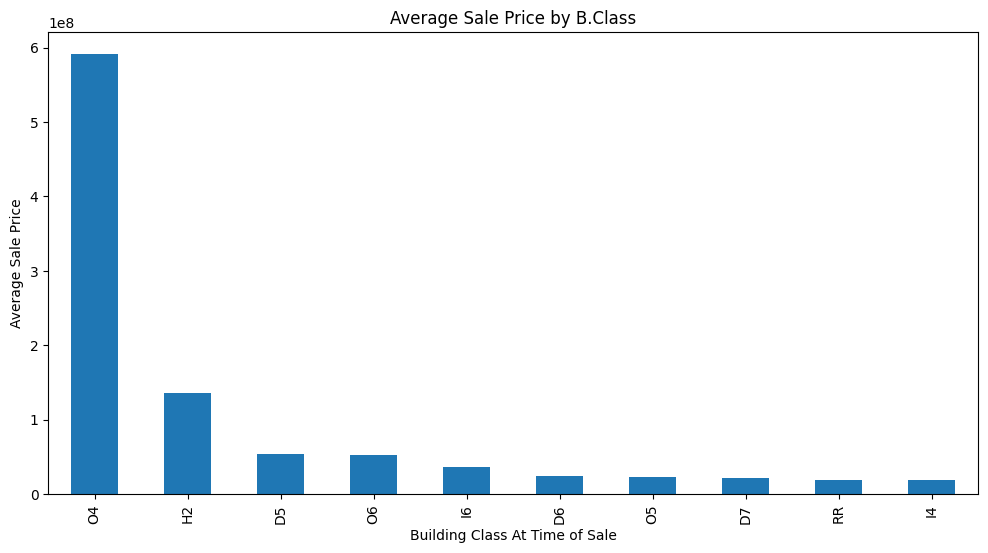

BUILDING CLASS AT TIME OF SALE
O4    5.913344e+08
H2    1.353760e+08
D5    5.406714e+07
O6    5.186326e+07
I6    3.666667e+07
Name: SALE PRICE, dtype: float64


,RANK,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,sale_price_zscore,sale_price_zscore_neighborhood,square_ft_per_unit,price_per_unit,price_per_square_ft,SALE PRICE_avg_class
0,4,4,AIRPORT LA GUARDIA,01 ONE FAMILY DWELLINGS,1,976,15,,A5,21-20 81ST STREET,...,1,A5,792000,7/26/2017 0:00,-0.042477,1.084821,1224.000000,7.920000e+05,647.058824,473341.840551
1,5,4,AIRPORT LA GUARDIA,01 ONE FAMILY DWELLINGS,1,976,54,,A5,21-35 80TH STREET,...,1,A5,10,6/13/2017 0:00,-0.111917,-0.885008,1224.000000,1.000000e+01,0.008170,473341.840551
2,6,4,AIRPORT LA GUARDIA,01 ONE FAMILY DWELLINGS,1,976,63,,A5,21-17 80TH STREET,...,1,A5,275500,11/18/2016 0:00,-0.087763,-0.199812,1224.000000,2.755000e+05,225.081699,473341.840551
4,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,2,C2,6625000,7/19/2017 0:00,0.468954,-0.707107,1288.000000,1.325000e+06,1028.726708,922703.865672
5,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,2,C2,8000000,11/17/2016 0:00,0.589513,0.707107,769.166667,1.333333e+06,1733.477790,922703.865672
32,15,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,6214,12,,A2,143 FABIAN STREET,...,1,A2,675000,3/3/2017 0:00,-0.052735,0.948461,2270.000000,6.750000e+05,297.356828,518249.991815
33,33,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,6226,93,,A2,55 JEFFERSON BOULEVARD,...,1,A2,442000,11/7/2016 0:00,-0.073164,-0.151844,1360.000000,4.420000e+05,325.000000,518249.991815
35,36,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,6233,25,,A2,210 RENSSELAER AVENUE,...,1,A2,10,4/11/2017 0:00,-0.111917,-2.239069,960.000000,1.000000e+01,0.010417,518249.991815
36,38,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,6234,45,,A2,578 ARDEN AVENUE,...,1,A2,490000,9/26/2016 0:00,-0.068956,0.074828,1290.000000,4.900000e+05,379.844961,518249.991815
38,41,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,6235,27,,A2,140 SINCLAIR AVENUE,...,1,A2,475000,7/13/2017 0:00,-0.070271,0.003993,1176.000000,4.750000e+05,403.911565,518249.991815


In [ ]:
# NEW FEATURE: Average Price per Building Class
average_price_by_class = df_p.groupby('BUILDING CLASS AT TIME OF SALE')['SALE PRICE'].mean()
average_price_by_class_sorted = average_price_by_class.sort_values(ascending=False).head(10)


plt.figure(figsize=(12, 6))
average_price_by_class_sorted.plot(kind='bar')
plt.xlabel('Building Class At Time of Sale')
plt.ylabel('Average Sale Price')
plt.title('Average Sale Price by B.Class')
plt.xticks(rotation=90)
plt.show()

print(average_price_by_class_sorted.head(5))

# Join the new feature
df_p = df_p.join(average_price_by_class, on='BUILDING CLASS AT TIME OF SALE', rsuffix='_avg_class')
df_p.head(10)

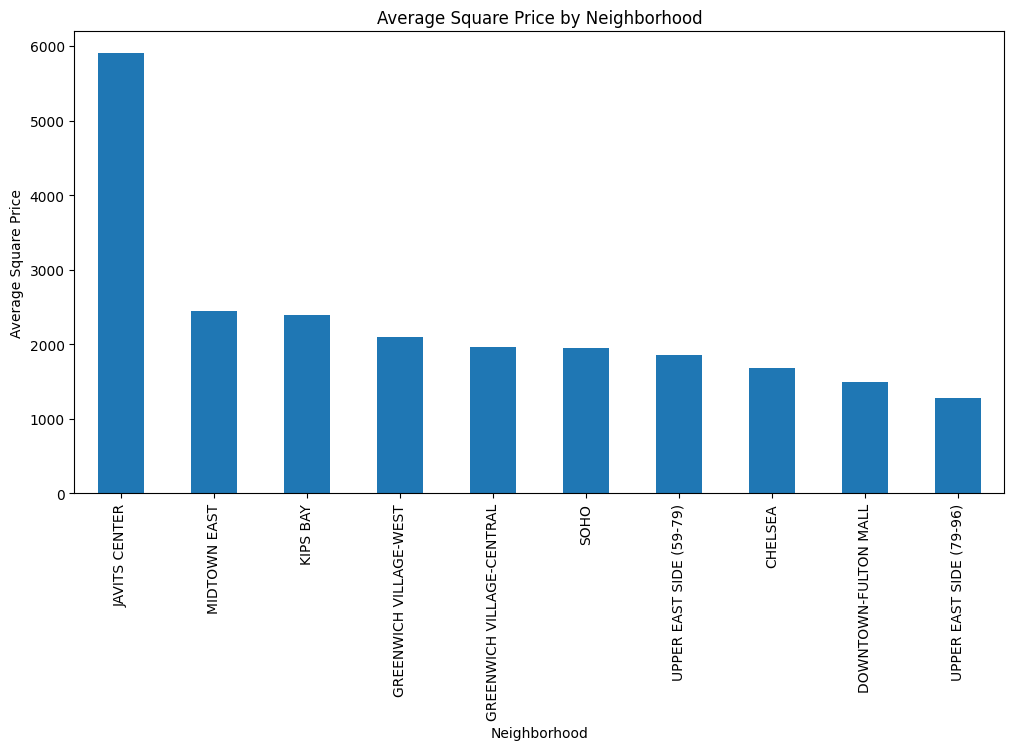

NEIGHBORHOOD
AIRPORT LA GUARDIA    290.716231
ALPHABET CITY         961.289776
ANNADALE              312.905194
ARDEN HEIGHTS         267.592374
ARROCHAR              346.117296
Name: price_per_square_ft, dtype: float64


,RANK,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,sale_price_zscore,sale_price_zscore_neighborhood,square_ft_per_unit,price_per_unit,price_per_square_ft,SALE PRICE_avg_class,price_per_square_ft_avg_neighborhood
0,4,4,AIRPORT LA GUARDIA,01 ONE FAMILY DWELLINGS,1,976,15,,A5,21-20 81ST STREET,...,A5,792000,7/26/2017 0:00,-0.042477,1.084821,1224.000000,7.920000e+05,647.058824,473341.840551,290.716231
1,5,4,AIRPORT LA GUARDIA,01 ONE FAMILY DWELLINGS,1,976,54,,A5,21-35 80TH STREET,...,A5,10,6/13/2017 0:00,-0.111917,-0.885008,1224.000000,1.000000e+01,0.008170,473341.840551,290.716231
2,6,4,AIRPORT LA GUARDIA,01 ONE FAMILY DWELLINGS,1,976,63,,A5,21-17 80TH STREET,...,A5,275500,11/18/2016 0:00,-0.087763,-0.199812,1224.000000,2.755000e+05,225.081699,473341.840551,290.716231
4,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,C2,6625000,7/19/2017 0:00,0.468954,-0.707107,1288.000000,1.325000e+06,1028.726708,922703.865672,961.289776
5,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,C2,8000000,11/17/2016 0:00,0.589513,0.707107,769.166667,1.333333e+06,1733.477790,922703.865672,961.289776
32,15,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,6214,12,,A2,143 FABIAN STREET,...,A2,675000,3/3/2017 0:00,-0.052735,0.948461,2270.000000,6.750000e+05,297.356828,518249.991815,312.905194
33,33,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,6226,93,,A2,55 JEFFERSON BOULEVARD,...,A2,442000,11/7/2016 0:00,-0.073164,-0.151844,1360.000000,4.420000e+05,325.000000,518249.991815,312.905194
35,36,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,6233,25,,A2,210 RENSSELAER AVENUE,...,A2,10,4/11/2017 0:00,-0.111917,-2.239069,960.000000,1.000000e+01,0.010417,518249.991815,312.905194
36,38,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,6234,45,,A2,578 ARDEN AVENUE,...,A2,490000,9/26/2016 0:00,-0.068956,0.074828,1290.000000,4.900000e+05,379.844961,518249.991815,312.905194
38,41,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,6235,27,,A2,140 SINCLAIR AVENUE,...,A2,475000,7/13/2017 0:00,-0.070271,0.003993,1176.000000,4.750000e+05,403.911565,518249.991815,312.905194


In [ ]:
# NEW FEATURE: Average Price per Square ft (for units) by Neighborhood--> square_price
average_square_price_by_neighborhood = df_p.groupby('NEIGHBORHOOD')['price_per_square_ft'].mean()
average_square_price_by_neighborhood_sorted = average_square_price_by_neighborhood.sort_values(ascending=False).head(10)


plt.figure(figsize=(12, 6))
average_square_price_by_neighborhood_sorted.plot(kind='bar')
plt.xlabel('Neighborhood')
plt.ylabel('Average Square Price')
plt.title('Average Square Price by Neighborhood')
plt.xticks(rotation=90)
plt.show()

print(average_square_price_by_neighborhood.head(5))

df_p = df_p.join(average_square_price_by_neighborhood, on='NEIGHBORHOOD', rsuffix='_avg_neighborhood')
df_p.head(10)

In [ ]:
# z-score for square price
mean = average_square_price_by_neighborhood.mean()
std = average_square_price_by_neighborhood.std()


df_p['av_square_price_neighb_zscore'] = (df_p['price_per_square_ft_avg_neighborhood']- mean)
df_p['av_square_price_neighb_zscore'] /= std

df_p.head(10)

,RANK,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,SALE PRICE,SALE DATE,sale_price_zscore,sale_price_zscore_neighborhood,square_ft_per_unit,price_per_unit,price_per_square_ft,SALE PRICE_avg_class,price_per_square_ft_avg_neighborhood,av_square_price_neighb_zscore
0,4,4,AIRPORT LA GUARDIA,01 ONE FAMILY DWELLINGS,1,976,15,,A5,21-20 81ST STREET,...,792000,7/26/2017 0:00,-0.042477,1.084821,1224.000000,7.920000e+05,647.058824,473341.840551,290.716231,-0.307546
1,5,4,AIRPORT LA GUARDIA,01 ONE FAMILY DWELLINGS,1,976,54,,A5,21-35 80TH STREET,...,10,6/13/2017 0:00,-0.111917,-0.885008,1224.000000,1.000000e+01,0.008170,473341.840551,290.716231,-0.307546
2,6,4,AIRPORT LA GUARDIA,01 ONE FAMILY DWELLINGS,1,976,63,,A5,21-17 80TH STREET,...,275500,11/18/2016 0:00,-0.087763,-0.199812,1224.000000,2.755000e+05,225.081699,473341.840551,290.716231,-0.307546
4,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,6625000,7/19/2017 0:00,0.468954,-0.707107,1288.000000,1.325000e+06,1028.726708,922703.865672,961.289776,1.025365
5,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,8000000,11/17/2016 0:00,0.589513,0.707107,769.166667,1.333333e+06,1733.477790,922703.865672,961.289776,1.025365
32,15,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,6214,12,,A2,143 FABIAN STREET,...,675000,3/3/2017 0:00,-0.052735,0.948461,2270.000000,6.750000e+05,297.356828,518249.991815,312.905194,-0.263440
33,33,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,6226,93,,A2,55 JEFFERSON BOULEVARD,...,442000,11/7/2016 0:00,-0.073164,-0.151844,1360.000000,4.420000e+05,325.000000,518249.991815,312.905194,-0.263440
35,36,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,6233,25,,A2,210 RENSSELAER AVENUE,...,10,4/11/2017 0:00,-0.111917,-2.239069,960.000000,1.000000e+01,0.010417,518249.991815,312.905194,-0.263440
36,38,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,6234,45,,A2,578 ARDEN AVENUE,...,490000,9/26/2016 0:00,-0.068956,0.074828,1290.000000,4.900000e+05,379.844961,518249.991815,312.905194,-0.263440
38,41,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,6235,27,,A2,140 SINCLAIR AVENUE,...,475000,7/13/2017 0:00,-0.070271,0.003993,1176.000000,4.750000e+05,403.911565,518249.991815,312.905194,-0.263440


In [ ]:
# NEW FEATURE: Building Age

# Convert column to date format
df_p['SALE DATE'] = pd.to_datetime(df_p['SALE DATE'])

# Extract the year
sale_year = df_p['SALE DATE'].dt.year

# Calculate the building age
df_p['BUILDING AGE'] = sale_year - df_p['YEAR BUILT']
df_p['sale_year'] = df_p['SALE DATE'].dt.year

print(df_p[['YEAR BUILT', 'SALE DATE', 'BUILDING AGE']].head())

   YEAR BUILT  SALE DATE  BUILDING AGE
0        1950 2017-07-26            67
1        1950 2017-06-13            67
2        1950 2016-11-18            66
4        1900 2017-07-19           117
5        1900 2016-11-17           116


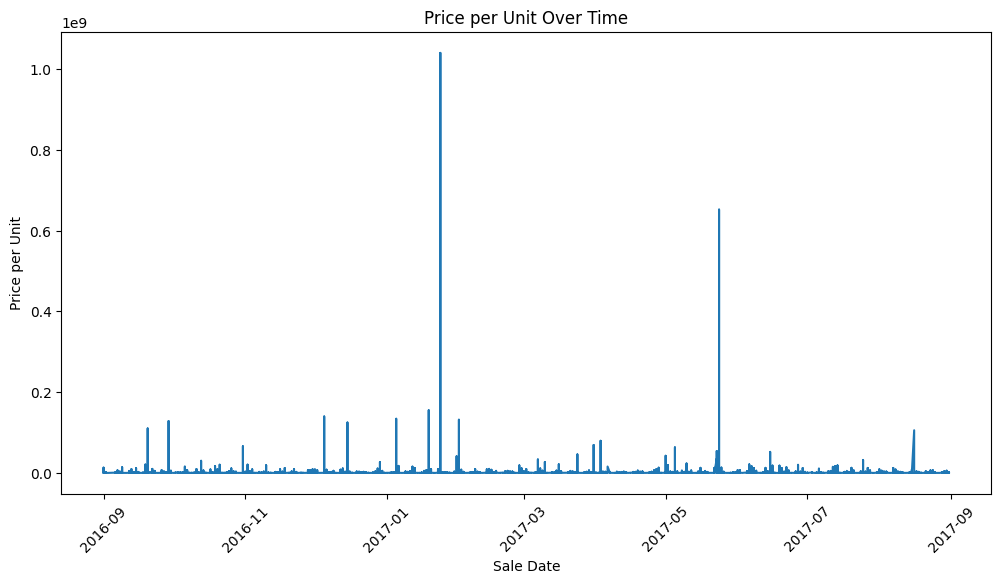

In [ ]:
# How does Price per Unit evolve over SALE DATE?

# Convert to datetime
df_p['SALE DATE'] = pd.to_datetime(df_p['SALE DATE'])
df_sorted = df_p.sort_values('SALE DATE')

# Plot the sale price over time
plt.figure(figsize=(12, 6))
plt.plot(df_sorted['SALE DATE'], df_sorted['price_per_unit'])
plt.xlabel('Sale Date')
plt.ylabel('Price per Unit')
plt.title('Price per Unit Over Time')
plt.xticks(rotation=45)
plt.show()

# First overview: no recognizable pattern by eyeballing

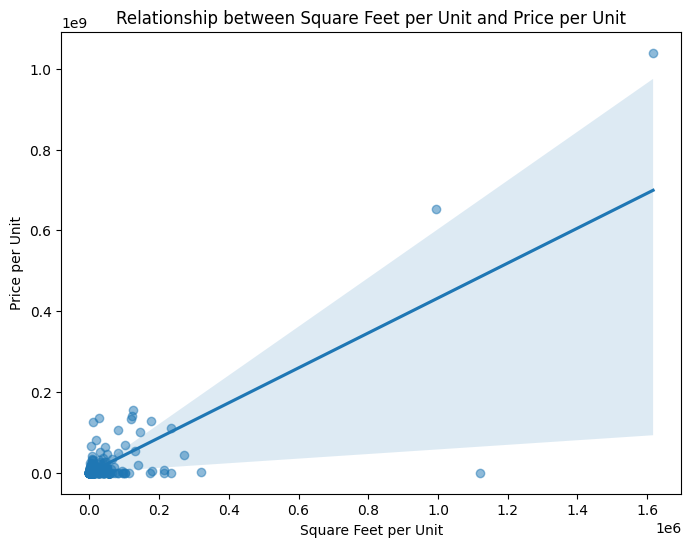

Correlation Coefficient: 0.7979306791979928


In [ ]:
# Exploring price vs square ft. per unit
import seaborn as sns
# Plot scatter plot
plt.figure(figsize=(8, 6))
sns.regplot(x='square_ft_per_unit', y='price_per_unit', data=df_p, scatter_kws={'alpha': 0.5})
plt.xlabel('Square Feet per Unit')
plt.ylabel('Price per Unit')
plt.title('Relationship between Square Feet per Unit and Price per Unit')
plt.show()


correlation_coefficient = df_p['square_ft_per_unit'].corr(df_p['price_per_unit'])
print(f"Correlation Coefficient: {correlation_coefficient}")

In [ ]:
#Some variables are object class
data_types = df_p.dtypes
print(data_types)

RANK                                             int32
BOROUGH                                          int32
NEIGHBORHOOD                                    object
BUILDING CLASS CATEGORY                         object
TAX CLASS AT PRESENT                            object
BLOCK                                            int32
LOT                                              int32
EASE-MENT                                       object
BUILDING CLASS AT PRESENT                       object
ADDRESS                                         object
APARTMENT NUMBER                                object
ZIP CODE                                         int32
RESIDENTIAL UNITS                                int32
COMMERCIAL UNITS                                 int32
TOTAL UNITS                                      int32
LAND SQUARE FEET                                 int64
GROSS SQUARE FEET                                int64
YEAR BUILT                                       int32
TAX CLASS 

In [ ]:
df_p.head(5)

,RANK,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,sale_price_zscore,sale_price_zscore_neighborhood,square_ft_per_unit,price_per_unit,price_per_square_ft,SALE PRICE_avg_class,price_per_square_ft_avg_neighborhood,av_square_price_neighb_zscore,BUILDING AGE,sale_year
0,4,4,AIRPORT LA GUARDIA,01 ONE FAMILY DWELLINGS,1,976,15,,A5,21-20 81ST STREET,...,-0.042477,1.084821,1224.000000,7.920000e+05,647.058824,473341.840551,290.716231,-0.307546,67,2017
1,5,4,AIRPORT LA GUARDIA,01 ONE FAMILY DWELLINGS,1,976,54,,A5,21-35 80TH STREET,...,-0.111917,-0.885008,1224.000000,1.000000e+01,0.008170,473341.840551,290.716231,-0.307546,67,2017
2,6,4,AIRPORT LA GUARDIA,01 ONE FAMILY DWELLINGS,1,976,63,,A5,21-17 80TH STREET,...,-0.087763,-0.199812,1224.000000,2.755000e+05,225.081699,473341.840551,290.716231,-0.307546,66,2016
4,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,0.468954,-0.707107,1288.000000,1.325000e+06,1028.726708,922703.865672,961.289776,1.025365,117,2017
5,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,0.589513,0.707107,769.166667,1.333333e+06,1733.477790,922703.865672,961.289776,1.025365,116,2016


Last Exploration Before Analysis

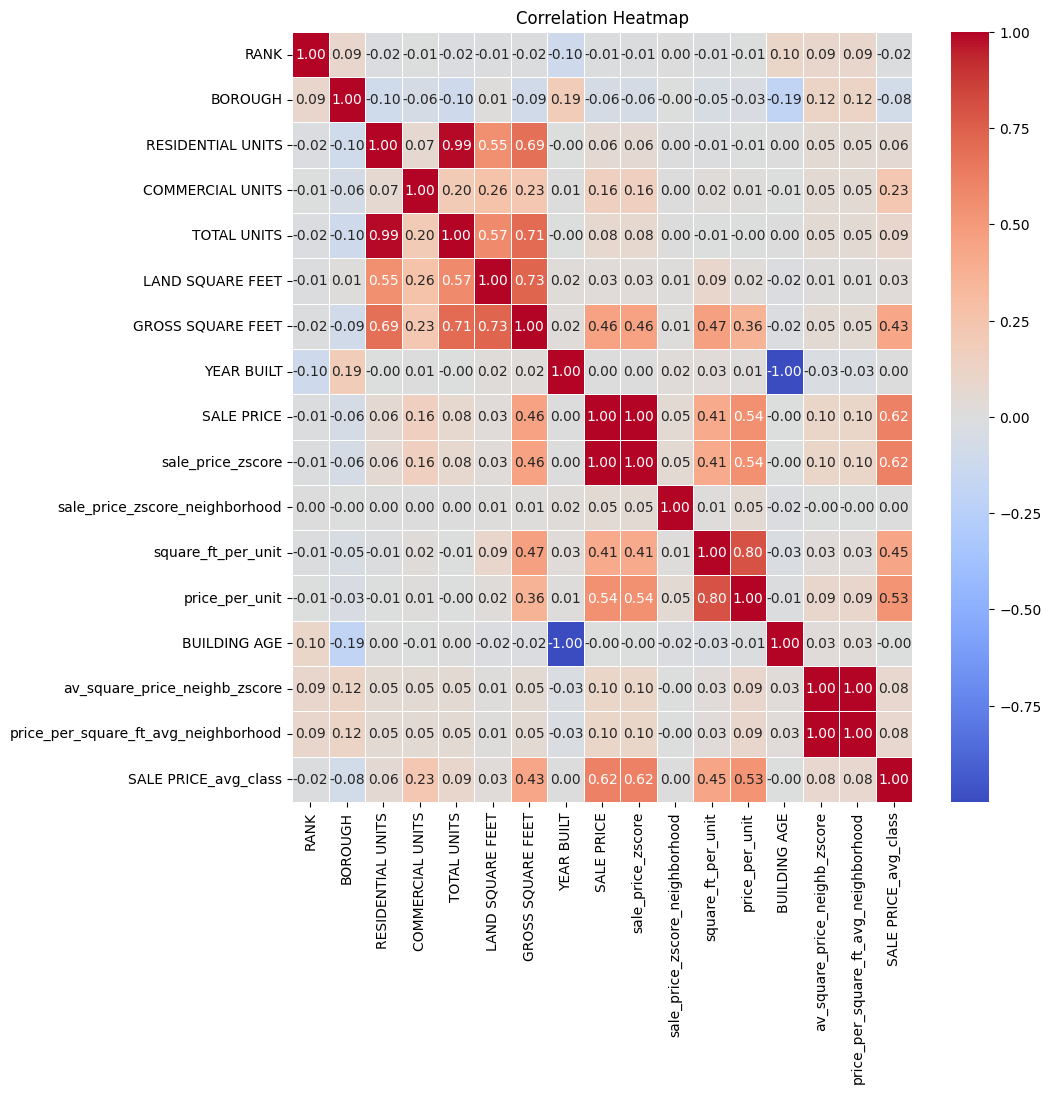

In [ ]:
#Redo the Corr heatmap with new features

# Select the numerical columns
numerical_data_features = ['RANK', 'BOROUGH', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS',
       'TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'SALE PRICE', 'sale_price_zscore', 'sale_price_zscore_neighborhood',
       'square_ft_per_unit', 'price_per_unit', 'BUILDING AGE',
       'av_square_price_neighb_zscore', 'price_per_square_ft_avg_neighborhood', 'SALE PRICE_avg_class']

# Select the numerical columns from the DataFrame
numerical_data = df_p[numerical_data_features]
#drop ' -  ' values
numerical_data = numerical_data.replace(' -  ', np.nan)
numerical_data.dropna(inplace=True)

# Correlation matrix
correlation_matrix = numerical_data.corr()

# Create a heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Try Linear Regression

In [ ]:
columns_to_include = ['square_ft_per_unit', 'av_square_price_neighb_zscore', 'GROSS SQUARE FEET',
                      'sale_price_zscore_neighborhood', 'COMMERCIAL UNITS']

# Fit model
X = df_p[columns_to_include]
y = df_p['SALE PRICE']

X.head(10)
y.head(10)

0      792000
1          10
2      275500
4     6625000
5     8000000
32     675000
33     442000
35         10
36     490000
38     475000
Name: SALE PRICE, dtype: int64

In [ ]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

# This model's performance is weak.

Mean Squared Error: 457913226901278.1
R-squared: -28.558225632765605


Let's Try LightGBM (Non-linear, cat + num variables)

Preprocessing for categorical variables before LightGBM

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Map cat variable Tax Class

df_p = df_p.dropna(subset=['TAX CLASS AT TIME OF SALE'])
# Define the ordinal mapping dictionary
ordinal_mapping = {1: 3, 2: 2, 3: 1, 4: 0}


# Perform ordinal mapping
df_p['TAX CLASS AT TIME OF SALE'] = df_p['TAX CLASS AT TIME OF SALE'].map(ordinal_mapping)


# Print the unique encoded values
encoded_values = df_p['TAX CLASS AT TIME OF SALE'].unique()
print(encoded_values)
df_p.head(10)

[3 2 0]


,RANK,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,sale_price_zscore,sale_price_zscore_neighborhood,square_ft_per_unit,price_per_unit,price_per_square_ft,SALE PRICE_avg_class,price_per_square_ft_avg_neighborhood,av_square_price_neighb_zscore,BUILDING AGE,sale_year
0,4,4,AIRPORT LA GUARDIA,01 ONE FAMILY DWELLINGS,1,976,15,,A5,21-20 81ST STREET,...,-0.042477,1.084821,1224.000000,7.920000e+05,647.058824,473341.840551,290.716231,-0.307546,67,2017
1,5,4,AIRPORT LA GUARDIA,01 ONE FAMILY DWELLINGS,1,976,54,,A5,21-35 80TH STREET,...,-0.111917,-0.885008,1224.000000,1.000000e+01,0.008170,473341.840551,290.716231,-0.307546,67,2017
2,6,4,AIRPORT LA GUARDIA,01 ONE FAMILY DWELLINGS,1,976,63,,A5,21-17 80TH STREET,...,-0.087763,-0.199812,1224.000000,2.755000e+05,225.081699,473341.840551,290.716231,-0.307546,66,2016
4,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,0.468954,-0.707107,1288.000000,1.325000e+06,1028.726708,922703.865672,961.289776,1.025365,117,2017
5,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,0.589513,0.707107,769.166667,1.333333e+06,1733.477790,922703.865672,961.289776,1.025365,116,2016
32,15,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,6214,12,,A2,143 FABIAN STREET,...,-0.052735,0.948461,2270.000000,6.750000e+05,297.356828,518249.991815,312.905194,-0.263440,52,2017
33,33,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,6226,93,,A2,55 JEFFERSON BOULEVARD,...,-0.073164,-0.151844,1360.000000,4.420000e+05,325.000000,518249.991815,312.905194,-0.263440,86,2016
35,36,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,6233,25,,A2,210 RENSSELAER AVENUE,...,-0.111917,-2.239069,960.000000,1.000000e+01,0.010417,518249.991815,312.905194,-0.263440,57,2017
36,38,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,6234,45,,A2,578 ARDEN AVENUE,...,-0.068956,0.074828,1290.000000,4.900000e+05,379.844961,518249.991815,312.905194,-0.263440,81,2016
38,41,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,6235,27,,A2,140 SINCLAIR AVENUE,...,-0.070271,0.003993,1176.000000,4.750000e+05,403.911565,518249.991815,312.905194,-0.263440,52,2017


In [ ]:
df_p['BOROUGH'].dtype

dtype('int32')

In [ ]:
print(df_p['BOROUGH'].unique())

#Drop missing values
df_p = df_p[df_p['BOROUGH'] != ' -  ']
df_p = df_p.dropna(subset=['BOROUGH'])
df_p['BOROUGH'] = df_p['BOROUGH'].astype(str)
df_p['BOROUGH'] = df_p['BOROUGH'].str.strip()

# Map cat variable Borough
ordinal_mapping = {'1': 5, '3': 4, '4': 3, '2': 2, '5': 1}
df_p['BOROUGH'] = df_p['BOROUGH'].map(ordinal_mapping)
df_p.head(10)

[4 1 5 3 2]


,RANK,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,sale_price_zscore,sale_price_zscore_neighborhood,square_ft_per_unit,price_per_unit,price_per_square_ft,SALE PRICE_avg_class,price_per_square_ft_avg_neighborhood,av_square_price_neighb_zscore,BUILDING AGE,sale_year
0,4,3,AIRPORT LA GUARDIA,01 ONE FAMILY DWELLINGS,1,976,15,,A5,21-20 81ST STREET,...,-0.042477,1.084821,1224.000000,7.920000e+05,647.058824,473341.840551,290.716231,-0.307546,67,2017
1,5,3,AIRPORT LA GUARDIA,01 ONE FAMILY DWELLINGS,1,976,54,,A5,21-35 80TH STREET,...,-0.111917,-0.885008,1224.000000,1.000000e+01,0.008170,473341.840551,290.716231,-0.307546,67,2017
2,6,3,AIRPORT LA GUARDIA,01 ONE FAMILY DWELLINGS,1,976,63,,A5,21-17 80TH STREET,...,-0.087763,-0.199812,1224.000000,2.755000e+05,225.081699,473341.840551,290.716231,-0.307546,66,2016
4,4,5,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,0.468954,-0.707107,1288.000000,1.325000e+06,1028.726708,922703.865672,961.289776,1.025365,117,2017
5,8,5,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,0.589513,0.707107,769.166667,1.333333e+06,1733.477790,922703.865672,961.289776,1.025365,116,2016
32,15,1,ANNADALE,01 ONE FAMILY DWELLINGS,1,6214,12,,A2,143 FABIAN STREET,...,-0.052735,0.948461,2270.000000,6.750000e+05,297.356828,518249.991815,312.905194,-0.263440,52,2017
33,33,1,ANNADALE,01 ONE FAMILY DWELLINGS,1,6226,93,,A2,55 JEFFERSON BOULEVARD,...,-0.073164,-0.151844,1360.000000,4.420000e+05,325.000000,518249.991815,312.905194,-0.263440,86,2016
35,36,1,ANNADALE,01 ONE FAMILY DWELLINGS,1,6233,25,,A2,210 RENSSELAER AVENUE,...,-0.111917,-2.239069,960.000000,1.000000e+01,0.010417,518249.991815,312.905194,-0.263440,57,2017
36,38,1,ANNADALE,01 ONE FAMILY DWELLINGS,1,6234,45,,A2,578 ARDEN AVENUE,...,-0.068956,0.074828,1290.000000,4.900000e+05,379.844961,518249.991815,312.905194,-0.263440,81,2016
38,41,1,ANNADALE,01 ONE FAMILY DWELLINGS,1,6235,27,,A2,140 SINCLAIR AVENUE,...,-0.070271,0.003993,1176.000000,4.750000e+05,403.911565,518249.991815,312.905194,-0.263440,52,2017


In [ ]:
# Last check for data cleanliness and outliers:
# Here I removed outliers from the dataset and it worsened my R2.
# Therefore I use the set with outliers.

missing_values_count = df_p.isnull().sum()
print(missing_values_count)

from scipy import stats

threshold = 3  # Set the z-score threshold for outlier detection

outlier_indices = df_p[df_p['sale_price_zscore'].abs() > threshold].index  # Find indices of outliers
print(outlier_indices)

df_p_cleaned = df_p.drop(outlier_indices)  # Remove outliers from the DataFrame
df_p_cleaned.head(10)

RANK                                    0
BOROUGH                                 0
NEIGHBORHOOD                            0
BUILDING CLASS CATEGORY                 0
TAX CLASS AT PRESENT                    0
BLOCK                                   0
LOT                                     0
EASE-MENT                               0
BUILDING CLASS AT PRESENT               0
ADDRESS                                 0
APARTMENT NUMBER                        0
ZIP CODE                                0
RESIDENTIAL UNITS                       0
COMMERCIAL UNITS                        0
TOTAL UNITS                             0
LAND SQUARE FEET                        0
GROSS SQUARE FEET                       0
YEAR BUILT                              0
TAX CLASS AT TIME OF SALE               0
BUILDING CLASS AT TIME OF SALE          0
SALE PRICE                              0
SALE DATE                               0
sale_price_zscore                       0
sale_price_zscore_neighborhood    

,RANK,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,sale_price_zscore,sale_price_zscore_neighborhood,square_ft_per_unit,price_per_unit,price_per_square_ft,SALE PRICE_avg_class,price_per_square_ft_avg_neighborhood,av_square_price_neighb_zscore,BUILDING AGE,sale_year
0,4,3,AIRPORT LA GUARDIA,01 ONE FAMILY DWELLINGS,1,976,15,,A5,21-20 81ST STREET,...,-0.042477,1.084821,1224.000000,7.920000e+05,647.058824,473341.840551,290.716231,-0.307546,67,2017
1,5,3,AIRPORT LA GUARDIA,01 ONE FAMILY DWELLINGS,1,976,54,,A5,21-35 80TH STREET,...,-0.111917,-0.885008,1224.000000,1.000000e+01,0.008170,473341.840551,290.716231,-0.307546,67,2017
2,6,3,AIRPORT LA GUARDIA,01 ONE FAMILY DWELLINGS,1,976,63,,A5,21-17 80TH STREET,...,-0.087763,-0.199812,1224.000000,2.755000e+05,225.081699,473341.840551,290.716231,-0.307546,66,2016
4,4,5,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,0.468954,-0.707107,1288.000000,1.325000e+06,1028.726708,922703.865672,961.289776,1.025365,117,2017
5,8,5,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,0.589513,0.707107,769.166667,1.333333e+06,1733.477790,922703.865672,961.289776,1.025365,116,2016
32,15,1,ANNADALE,01 ONE FAMILY DWELLINGS,1,6214,12,,A2,143 FABIAN STREET,...,-0.052735,0.948461,2270.000000,6.750000e+05,297.356828,518249.991815,312.905194,-0.263440,52,2017
33,33,1,ANNADALE,01 ONE FAMILY DWELLINGS,1,6226,93,,A2,55 JEFFERSON BOULEVARD,...,-0.073164,-0.151844,1360.000000,4.420000e+05,325.000000,518249.991815,312.905194,-0.263440,86,2016
35,36,1,ANNADALE,01 ONE FAMILY DWELLINGS,1,6233,25,,A2,210 RENSSELAER AVENUE,...,-0.111917,-2.239069,960.000000,1.000000e+01,0.010417,518249.991815,312.905194,-0.263440,57,2017
36,38,1,ANNADALE,01 ONE FAMILY DWELLINGS,1,6234,45,,A2,578 ARDEN AVENUE,...,-0.068956,0.074828,1290.000000,4.900000e+05,379.844961,518249.991815,312.905194,-0.263440,81,2016
38,41,1,ANNADALE,01 ONE FAMILY DWELLINGS,1,6235,27,,A2,140 SINCLAIR AVENUE,...,-0.070271,0.003993,1176.000000,4.750000e+05,403.911565,518249.991815,312.905194,-0.263440,52,2017


Deploying LightGBM

In [ ]:
!pip install lightgbm
import lightgbm as lgb
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error


columns_to_include = ['square_ft_per_unit', 'av_square_price_neighb_zscore', 'GROSS SQUARE FEET',
                      'sale_price_zscore_neighborhood', 'COMMERCIAL UNITS']

# Stepping out of the task description and using 'price_per_unit' instead of 'SALE PRICE'.
X = df_p[columns_to_include]
y = df_p['price_per_unit']

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.24, random_state=42)
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test)

params = {
    'objective': 'regression',
    'metric': 'rmse',
    'num_leaves': 30,
    'learning_rate': 0.012,
    'feature_fraction': 0.7,
    'bagging_fraction': 0.8,
    'bagging_freq': 10,
    'verbose': 0,
    'max_depth': 10,
    'min_child_samples': 10
}

model = lgb.train(params, train_data, num_boost_round=240)


y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

# RMSE
rmse = np.sqrt(mse)
print("RMSE:", rmse)

# MAE
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

Shape of X: (35025, 5)
Shape of y: (35025,)
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.101993 seconds.
You can set `force_col_wise=true` to remove the overhead.
Mean Squared Error: 850716861031.5144
R-squared: 0.8790232413029977
RMSE: 922343.1362738677
MAE: 188151.15398247825


Evaluate performance:

In [ ]:
# Preparing for mean sq log error
print("Missing values in y_pred:", np.isnan(y_pred).sum())
print("Missing values in y_test:", np.isnan(y_test).sum())
print("Negative values in y_pred:", (y_pred <= 0).sum())
print("Negative values in y_test:", (y_test <= 0).sum())

from sklearn.metrics import mean_squared_log_error

epsilon = 1e-10
y_pred_positive = np.maximum(y_pred, epsilon)
y_test_positive = np.maximum(y_test, epsilon)


y_pred_log = np.log1p(y_pred_positive)
y_test_log = np.log1p(y_test_positive)


rmsle = np.sqrt(mean_squared_log_error(y_test_log, y_pred_log))
print("RMSLE:", rmsle)


Missing values in y_pred: 0
Missing values in y_test: 0
Negative values in y_pred: 42
Negative values in y_test: 1736
RMSLE: 1.1758916940409239


In [ ]:
#Check features
feature_importances = model.feature_importance()

for feature, importance in zip(X_train.columns, feature_importances):
    print(f"Feature: {feature}, Importance: {importance}")

Feature: square_ft_per_unit, Importance: 1463
Feature: av_square_price_neighb_zscore, Importance: 1939
Feature: GROSS SQUARE FEET, Importance: 1450
Feature: sale_price_zscore_neighborhood, Importance: 1655
Feature: COMMERCIAL UNITS, Importance: 453


In [ ]:
# Checking RFE for Feature Selection

base_model = LinearRegression()
# Name RFE
rfe = RFE(estimator=base_model, n_features_to_select=5)

# Fit RFE
rfe.fit(X_train, y_train)

# Get the selected features
selected_features = X_train.columns[rfe.support_]

# Print the selected features
print("Selected Features:")
for feature in selected_features:
    print(feature)

Selected Features:
square_ft_per_unit
av_square_price_neighb_zscore
GROSS SQUARE FEET
sale_price_zscore_neighborhood
COMMERCIAL UNITS


In [ ]:
# Parameter GridSearch for fine-tuning hyperparameters:

from sklearn.model_selection import GridSearchCV

# Define the parameters
param_grid = {
    'num_leaves': [10, 20, 30],
    'learning_rate': [0.00001, 0.001, 0.01],
    'feature_fraction': [0.6, 0.7, 0.8],
    'max_depth': [5, 10, 15],
    'min_child_samples': [10, 20, 30]
}

# Creating the LightGBM model
model = lgb.LGBMRegressor(objective='regression', metric='rmse')

# Performing grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print
print("Best Parameters:", best_params)
print("Best Score (Negative Mean Squared Error):", best_score)

In [ ]:
#Best Parameters: {'feature_fraction': 0.7, 'learning_rate': 0.01, 'max_depth': 10, 'min_child_samples': 20, 'num_leaves': 30}
#Best Score (Negative Mean Squared Error): -58301247746153.39

Model Diagnostics

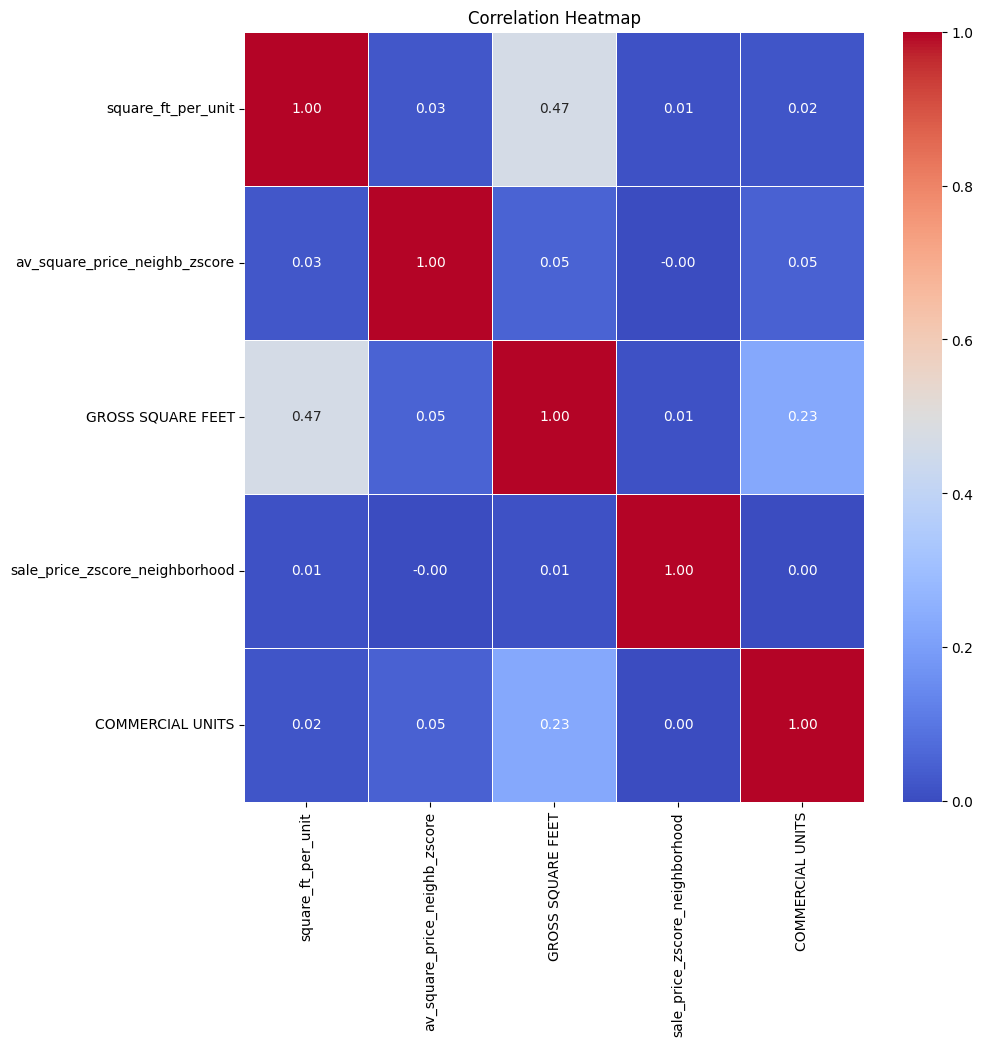

In [ ]:
# Correlation Matrix

# Select the numerical columns
numerical_data_features = ['square_ft_per_unit', 'av_square_price_neighb_zscore', 'GROSS SQUARE FEET',
                      'sale_price_zscore_neighborhood', 'COMMERCIAL UNITS']

# Select the numerical columns from the DataFrame
numerical_data = df_p[numerical_data_features]
#drop ' -  ' values
numerical_data = numerical_data.replace(' -  ', np.nan)
numerical_data.dropna(inplace=True)

# Correlation matrix
correlation_matrix = numerical_data.corr()

# Create a heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF for each predictor
vif = pd.DataFrame()
vif["Predictor"] = X_train.columns
vif["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

print(vif)

# VIF suggests no multicollinearity among predictors.

                        Predictor       VIF
0              square_ft_per_unit  1.876652
1   av_square_price_neighb_zscore  1.002759
2               GROSS SQUARE FEET  2.020070
3  sale_price_zscore_neighborhood  1.000337
4                COMMERCIAL UNITS  1.127077


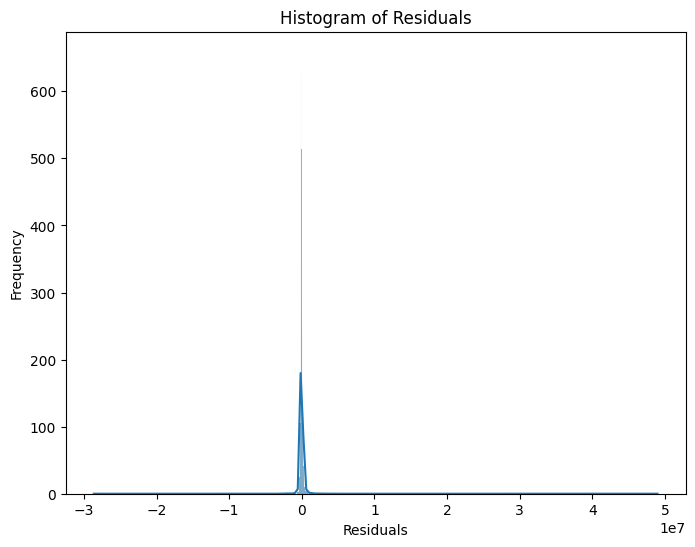

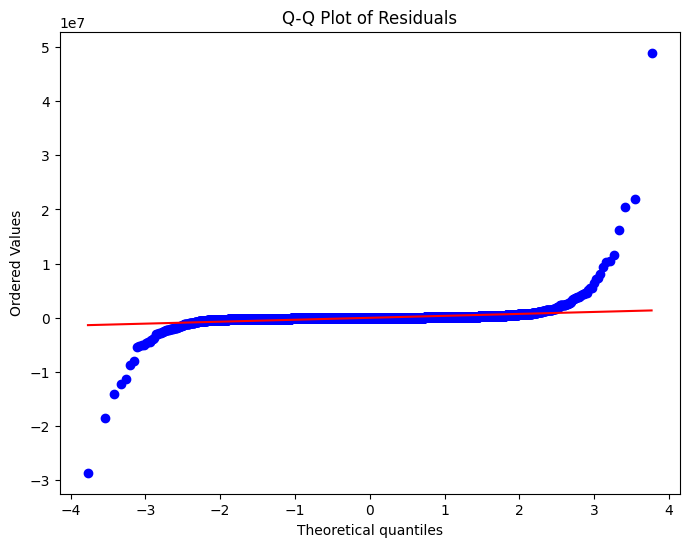

In [ ]:
# Normality of Residuals
residuals1 = y_test - y_pred

plt.figure(figsize=(8, 6))
sns.histplot(residuals1, kde=True)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(8, 6))
stats.probplot(residuals1, plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()

# Looks like my model might have extreme values. (Handling outliers did not yield better results previously, I will try again later in this notebook)

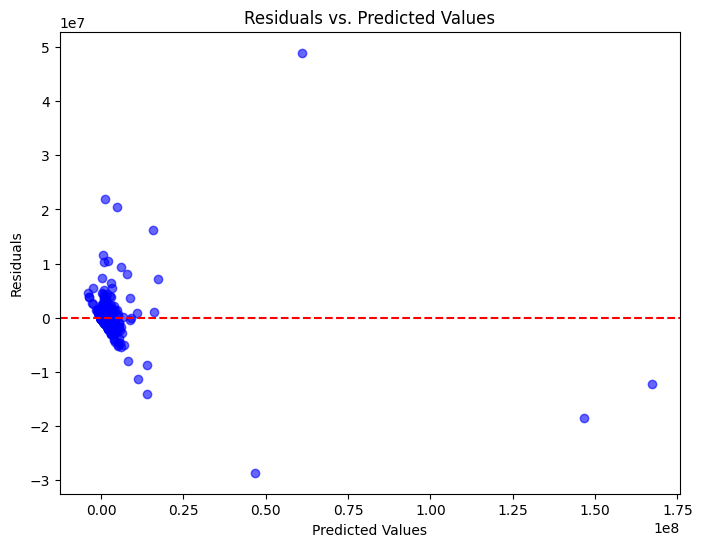

In [ ]:
# Plot the residuals against predicted values
residuals2 = y_test - y_pred

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals2, alpha=0.6, color='b')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values")
plt.show()

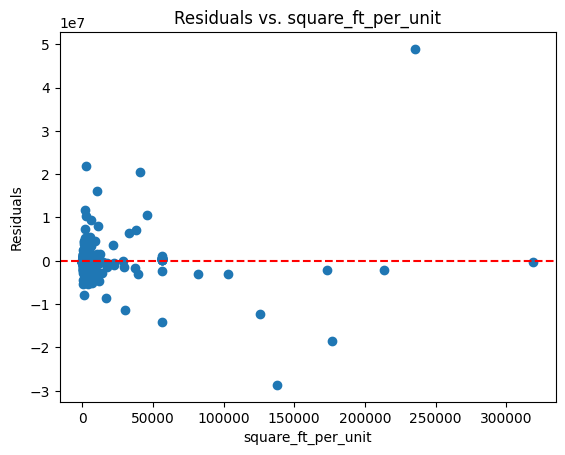

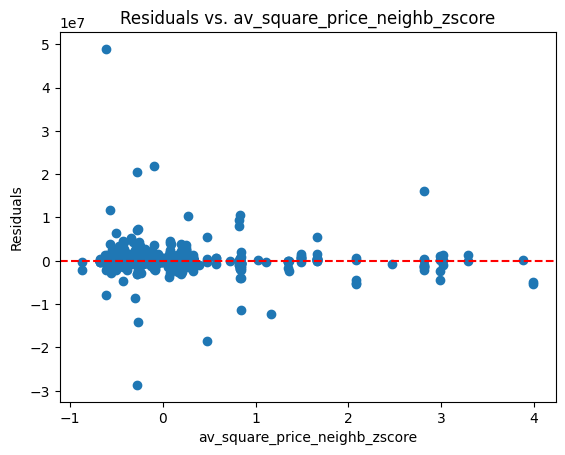

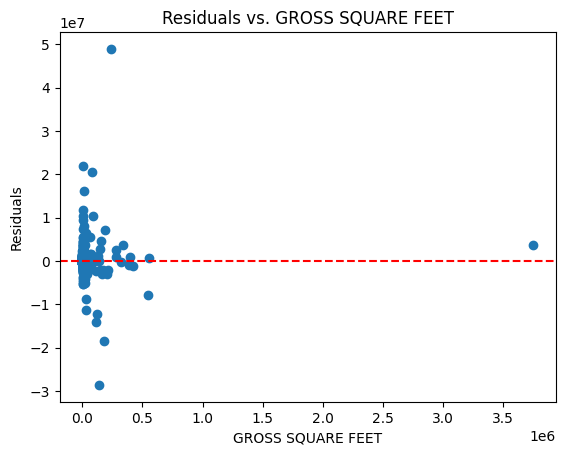

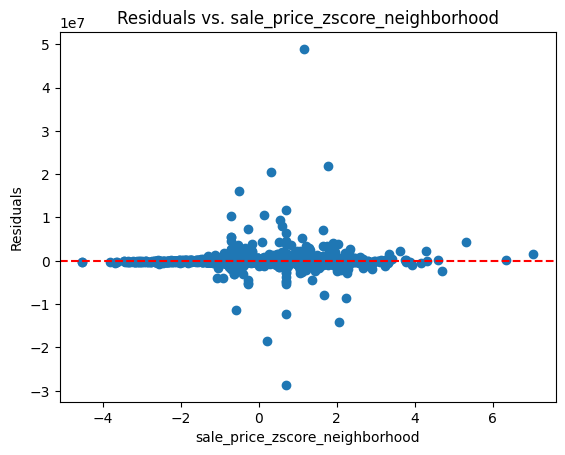

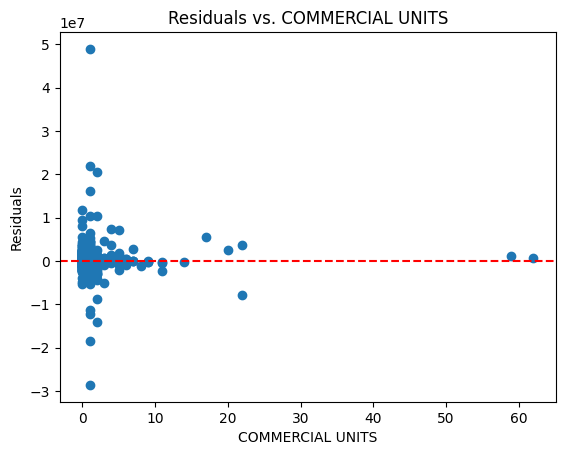

In [ ]:
# Residual indepentence
residuals = y_test - y_pred

# Plotting residuals for each independent variable
for column in X.columns:
    plt.scatter(X_test[column], residuals)
    plt.axhline(0, color='red', linestyle='dashed')
    plt.xlabel(column)
    plt.ylabel('Residuals')
    plt.title(f'Residuals vs. {column}')
    plt.show()



In [ ]:
# ST Deviation of Residuals
residuals = y_test - y_pred

# Calculate the standard deviation of residuals
residuals_std = np.std(residuals)

print("Standard deviation of residuals:", residuals_std)


Standard deviation of residuals: 922287.2902553801


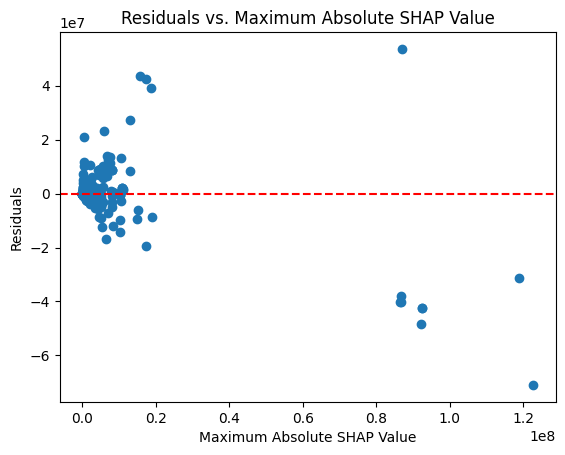

In [ ]:
!pip install shap
import shap

model = lgb.LGBMRegressor()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
residuals = y_test - y_pred
X_test_np = X_test.values
explainer = shap.Explainer(model)


# Calculating absolute SHAP values to identify influential points
shap_values = explainer.shap_values(X_test_np)
abs_shap_values = np.abs(shap_values)

# Calculating the maximum absolute SHAP value
max_abs_shap_values = np.max(abs_shap_values, axis=1)

# Plot residuals vs. maximum absolute SHAP values
plt.scatter(max_abs_shap_values, residuals)
plt.axhline(0, color='red', linestyle='dashed')
plt.xlabel('Maximum Absolute SHAP Value')
plt.ylabel('Residuals')
plt.title('Residuals vs. Maximum Absolute SHAP Value')
plt.show()

In [ ]:
# Handling outliers

# Influencial points
threshold_residuals = 1844574  # 2*St deviaton of my residuals
threshold_shap_values = 2.4  # %20 of the highest Max Absolute SHAP Value

influential_points_indices = np.where((np.abs(residuals) > threshold_residuals) &
                                      (max_abs_shap_values > threshold_shap_values))[0]

# Removing points with influence
X_test_filtered = X_test.drop(index=X_test.index[influential_points_indices])
y_test_filtered = y_test.drop(index=y_test.index[influential_points_indices])

# Retesting
y_pred_filtered = model.predict(X_test_filtered)
mse_filtered = mean_squared_error(y_test_filtered, y_pred_filtered)
r2_filtered = r2_score(y_test_filtered, y_pred_filtered)

print(f"Mean Squared Error after removing influential points: {mse_filtered}")
print(f"R-squared after removing influential points: {r2_filtered}")

# Model fit get slightly worse, while MSE goes down from 8e12 to 4e10.

Mean Squared Error after removing influential points: 43727936212.39555
R-squared after removing influential points: 0.8072574741601655


Try a 3rd model: XGBoost



In [ ]:
!pip install xgboost
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error

columns_to_include = ['square_ft_per_unit', 'av_square_price_neighb_zscore', 'GROSS SQUARE FEET',
                      'sale_price_zscore_neighborhood', 'COMMERCIAL UNITS']

X = df_p[columns_to_include]
y = df_p['price_per_unit']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.26, random_state=42)
model = xgb.XGBRegressor(objective='reg:squarederror',
                         n_estimators=140,
                         max_depth=10,
                         learning_rate=0.012)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

rmse = np.sqrt(mse)
print("RMSE:", rmse)

mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

# Best results achieved with LightGBM so far. Need for reducing MSE.

Mean Squared Error: 121795710903319.61
R-squared: 0.03408174723110735
RMSE: 11036109.40972042
MAE: 304163.18893051316


4th Model: Random Forests Model


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Split the sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.27, random_state=42)

# Initialize the Random Forests model
rf_model = RandomForestRegressor(n_estimators=150, random_state=42)

rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

# Calculate results
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 50362429742144.64
R-squared: 0.5852799511878045


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Initialize the Random Forests model
rf_model = RandomForestRegressor(random_state=42)

# Cross-validate
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)

# Use only the best parameters
best_rf_model = grid_search.best_estimator_
best_rf_model.fit(X_train, y_train)

y_pred = best_rf_model.predict(X_test)

# Model output
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Best hyperparameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 150}
Mean Squared Error: 50362429742144.64
R-squared: 0.5852799511878045


Verdict: LightGBM > Random Forests > XGBoost > Linear Regression Model

The overall fit of LightGBM model is good, while it's MSE is too large.
This might be due to not having fully leveraged features or optimally handled outliers.